In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
from datetime import date

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Reproducibility
SEED = 42
np.random.seed(SEED)

In [13]:
from datetime import date

symbol = "AAPL"                           # Stock ticker
start = "2016-01-01"
end = date.today().strftime("%Y-%m-%d")   # today's date in YYYY-MM-DD format

# Predict the next-day return
TARGET = "Target_Return_1d"

# Define test period (time-based split)
test_start_date = "2024-01-01"


In [14]:
df = yf.download(symbol, start=start, end=end)
df.index.name = "Date"  # ensure a clean datetime index

df.head()


/var/folders/n8/k6s3cgwn5gv4p4x929qsxlkc0000gn/T/ipykernel_10235/1416540064.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753155,23.757665,22.997834,23.135370,270597600
2016-01-05,23.157913,23.865885,23.090274,23.843339,223164000
2016-01-06,22.704723,23.081258,22.517585,22.673158,273829600
2016-01-07,21.746483,22.576209,21.741974,22.249279,324377600
2016-01-08,21.861465,22.346224,21.816372,22.219962,283192000


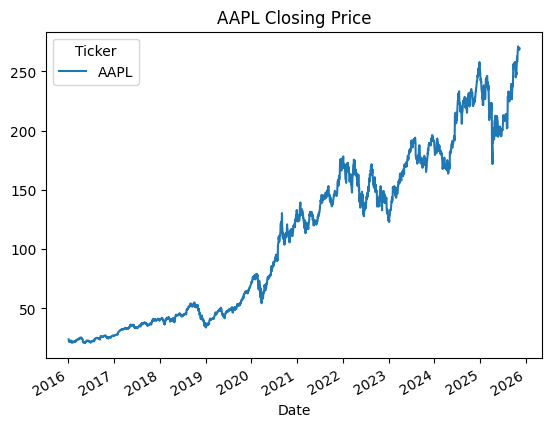

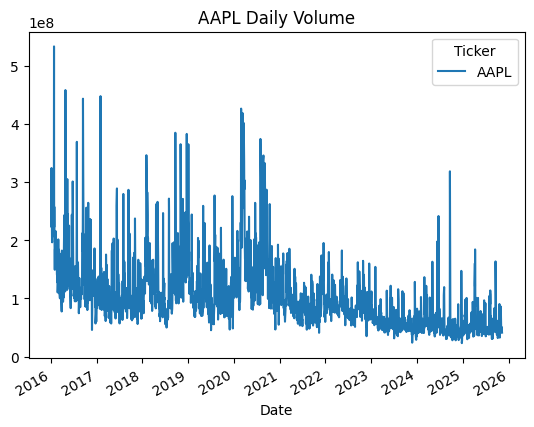

In [15]:
# ---------- 4) EDA: PRICE & VOLUME ----------
# Close over time
df["Close"].plot(title=f"{symbol} Closing Price")
plt.show()

# Volume over time
df["Volume"].plot(title=f"{symbol} Daily Volume")
plt.show()


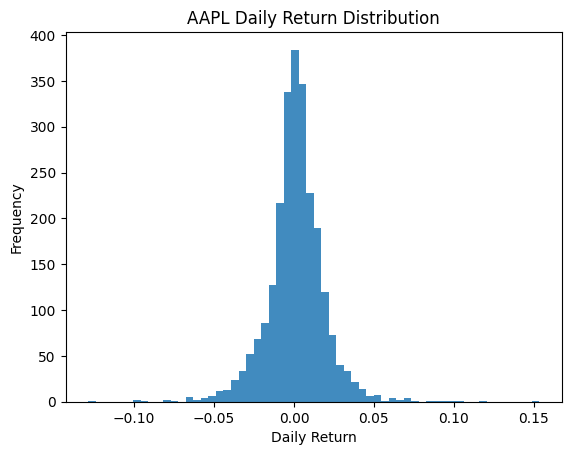

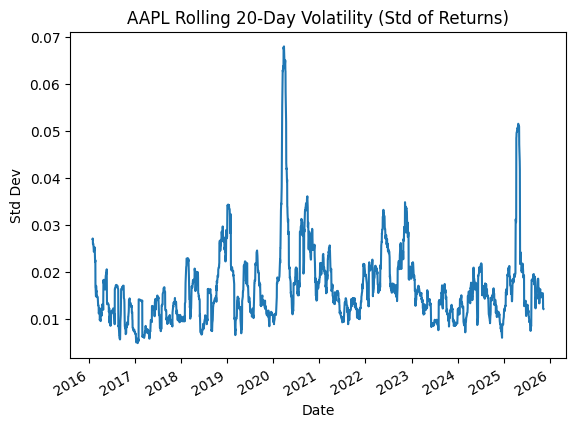

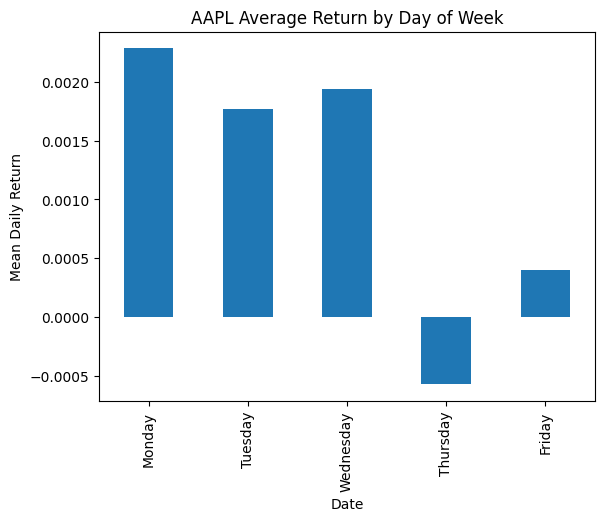

In [16]:
# --- Make sure columns are flat (handles yfinance-style MultiIndex) ---
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [c[0] if isinstance(c, tuple) else c for c in df.columns]

# --- Returns as a proper Series ---
ret = df["Close"].pct_change().dropna()    # 1D Series indexed by Date

# --- Distribution of daily returns ---
ret.plot(kind="hist", bins=60, alpha=0.85, title=f"{symbol} Daily Return Distribution")
plt.xlabel("Daily Return")
plt.show()

# --- Rolling 20-day volatility ---
ret.rolling(20).std().plot(title=f"{symbol} Rolling 20-Day Volatility (Std of Returns)")
plt.ylabel("Std Dev")
plt.show()

# --- Day-of-week behavior ---
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
ret.groupby(ret.index.day_name()).mean().reindex(dow_order).plot(
    kind="bar", title=f"{symbol} Average Return by Day of Week"
)
plt.ylabel("Mean Daily Return")
plt.show()
